In [21]:
import pandas

print('This model predicts the basketball player most similar in stats to the player you want to search for using Euclidean Distance being applied on a dataset with stats of NBA 2020-21 Season.\n')

print('We can use 3 different datasets-\n1.\tPer Game Stats\n2.\tPer 36 Minutes Stats \n3.\tAdvanced Stats \n')

print('Enter your choice of dataset to be used for analysis-\n1 for Per Game Stats \n2 for Per 36 Minutes Stats \n3 for Advanced Stats \n')

argument = int(input())

if (argument == 1):
    dataset = '/Users/arjunkhanchandani/Desktop/archive/nba2021_per_game.csv';
    data = 'Per Game Statistics'
    print('You selected the Per Game Stats.\n')
    parameters = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
    
elif(argument == 2):
    dataset = '/Users/arjunkhanchandani/Desktop/archive/nba2021_per36min.csv';
    data = 'Per 36 minutes Statistics'
    print('You selected the Per 36 Minutes Statistics.\n')
    parameters = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
    
elif(argument == 3):
    dataset = '/Users/arjunkhanchandani/Desktop/archive/nba2021_advanced.csv';
    data = 'Advanced Statistics'
    print('You selected the Advanced Stats.\n')
    parameters = ['G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']
    

else:
    print('Wrong Option')

with open(dataset, 'r') as csvfile:
    nba = pandas.read_csv(csvfile)

print('The different categories of stats in the dataset-\n')

stats = []
stats = nba.columns.values

for categories in stats:
    print(categories) 

This model predicts the basketball player most similar in stats to the player you want to search for using Euclidean Distance being applied on a dataset with stats of NBA 2020-21 Season.

We can use 3 different datasets-
1.	Per Game Stats
2.	Per 36 Minutes Stats 
3.	Advanced Stats 

Enter your choice of dataset to be used for analysis-
1 for Per Game Stats 
2 for Per 36 Minutes Stats 
3 for Advanced Stats 



 2


You selected the Per 36 Minutes Statistics.

The different categories of stats in the dataset-

Player
Pos
Age
Tm
G
GS
MP
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS


In [22]:
print('Enter the player who you want to find the player most similar to-')

player_name = str(input())

selected_player = nba[nba["Player"] == player_name].iloc[0]

nba_numeric = nba[parameters]

nba_normalized = (nba_numeric - nba_numeric.mean()) / nba_numeric.std()

from scipy.spatial import distance

nba_normalized.fillna(0, inplace=True)

player_normalized = nba_normalized[nba["Player"] == player_name]

euclidean_distances = nba_normalized.apply(lambda row: distance.euclidean(row, player_normalized), axis=1)

distance_frame = pandas.DataFrame(data={"dist": euclidean_distances, "idx": euclidean_distances.index})
distance_frame.sort_values("dist", inplace=True)

second_smallest = distance_frame.iloc[1]["idx"]
most_similar_to_player = nba.loc[int(second_smallest)]["Player"]

print('The player most similar to', player_name, 'using Euclidean Distance according to', data,'is', most_similar_to_player, 'of the team', nba.loc[int(second_smallest)]["Tm"], '\n')

Enter the player who you want to find the player most similar to-


 Stephen Curry


The player most similar to Stephen Curry using Euclidean Distance according to Per 36 minutes Statistics is Damian Lillard of the team POR 




Now we will train the Per Game Statistics Dataset for year 2019-20 using The KNN Regression Model to predict the Pts in the dataset for the year 2020-21 using all the other Stats Categories


The test dataset has-
 651 different players stats.

               Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...  \
80     Ryan Broekhoff  SG   29  DAL  17   1  10.6  1.3   3.5  0.373  ...   
443   Dejounte Murray  PG   23  SAS  66  58  25.6  4.5   9.7  0.462  ...   
200        Dante Exum  SG   24  UTA  11   0   7.5  0.9   2.1  0.435  ...   
194       James Ennis  SF   29  ORL  20  18  24.5  3.0   6.7  0.451  ...   
269     Udonis Haslem  PF   39  MIA   4   1  11.0  1.0   2.8  0.364  ...   
..                ...  ..  ...  ...  ..  ..   ...  ...   ...    ...  ...   
413      Jordan McRae  SG   28  DEN   4   0   8.0  0.5   1.5  0.333  ...   
483  Chandler Parsons  SF   31  ATL   5   0  10.8  1.0   3.6  0.278  ...   
411      Jordan McRae  SG   28  TOT  37   4  21.2  4.0   9.9  0.407  .

<ipython-input-25-fe9e0ee43e10>:57: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
<ipython-input-25-fe9e0ee43e10>:57: RuntimeWarning: invalid value encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
<ipython-input-25-fe9e0ee43e10>:57: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
<ipython-input-25-fe9e0ee43e10>:57: RuntimeWarning: invalid value encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
<ipython-input-25-fe9e0ee43e10>:57: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
<ipython-input-25-fe9e0ee43e10>:57: RuntimeWarning: invalid value encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
<ipython-input-25-fe9e0ee43e10>:57: RuntimeWarning: divide by zero encountered in true_divide
  r

1 



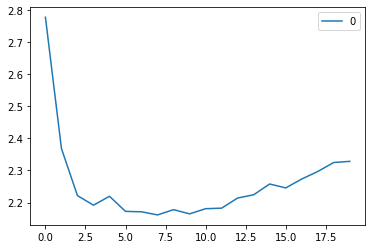

In [25]:
import random
from numpy.random import permutation
import math

per_game_dataset_20 = '/Users/arjunkhanchandani/Desktop/archive/nba_2020_per_game.csv'
per_game_dataset_21 = '/Users/arjunkhanchandani/Desktop/archive/nba2021_per_game.csv'

print('\nNow we will train the Per Game Statistics Dataset for year 2019-20 using The KNN Regression Model to predict the Pts in the dataset for the year 2020-21 using all the other Stats Categories\n')

with open(per_game_dataset_20, 'r') as csvfile:
    nba_knn_20 = pandas.read_csv(csvfile)

with open(per_game_dataset_21, 'r') as csvfile:
    nba_knn_21 = pandas.read_csv(csvfile)

print('\nThe test dataset has-\n', len(nba_knn_20), 'different players stats.\n')
random_indices = permutation(nba.index)
test_cutoff = len(nba_knn_21) + 1

test = nba_knn_20.loc[random_indices[1:test_cutoff]]
print(test)

print('\nThe train dataset has-\n', len(nba_knn_21), 'different players stats.\n')
train = nba_knn_21[1:]

print(train)

x_columns = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']

y_column = ["PTS"]

import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

pd.options.mode.chained_assignment = None 

clean_dataset(train[x_columns])
clean_dataset(test[x_columns])

from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
import pandas as pd

from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

rmse_val = []
mape_val = []

for K in range(1,21,1):
    
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    knn.fit(train[x_columns], train[y_column]) 
    predictions = knn.predict(test[x_columns])
    actual = test[y_column]
    
    rms_error = sqrt(mean_squared_error(actual, predictions)) 
    rmse_val.append(rms_error)
    
    print('RMSE value for k = ' , K , 'is:', rms_error, '\n')
    
    map_error = mape(actual, predictions)
    mape_val.append(map_error)
    
    print('MAPE value for k = ' , K , 'is:', map_error, '\n')
    
    
    
curve = pd.DataFrame(rmse_val) 
curve.plot()

min_rmse_val = min(rmse_val)
min_rmse_index = rmse_val.index(min_rmse_val)

min_mape_val = min(mape_val)
min_mape_index = mape_val.index(min_mape_val)

print('\nThe minimum value of Root Mean Square Error is- ', min_rmse_val, 'at K =', min_rmse_index + 1, '\n')

print('\nThe minimum value of Mean Absolute Percentage Error Value is- ', min_mape_val, 'at K =', min_mape_index + 1, '\n')

